# Übung: DEB-TKTD-Kalibrierung mit Toxizitätsdaten

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()
from scipy import stats
import pandas as pd
from copy import copy
import pprint
pp = pprint.PrettyPrinter(indent=2)
import os

current_dir = os.path.dirname(os.path.abspath(''))
project_directory = os.path.dirname(current_dir)

In [2]:
from mempyDEB.DEBODE.simulators import *
from mempyDEB.DEBODE.defaultparams import *

In [3]:
# automatische aktualisierung externer Python-Dateien
%load_ext autoreload
%autoreload 2 

# Einbindung zusätzlicher Funktionen 
from utils import * 
from ModelFitting import *

## Daten einlesen & Plotten

c:\Users\ellar\mem25\content\Part3_DEB\Ex03_TKTDFitting.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mem25\content\Part3_DEB\Ex03_TKTDFitting.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


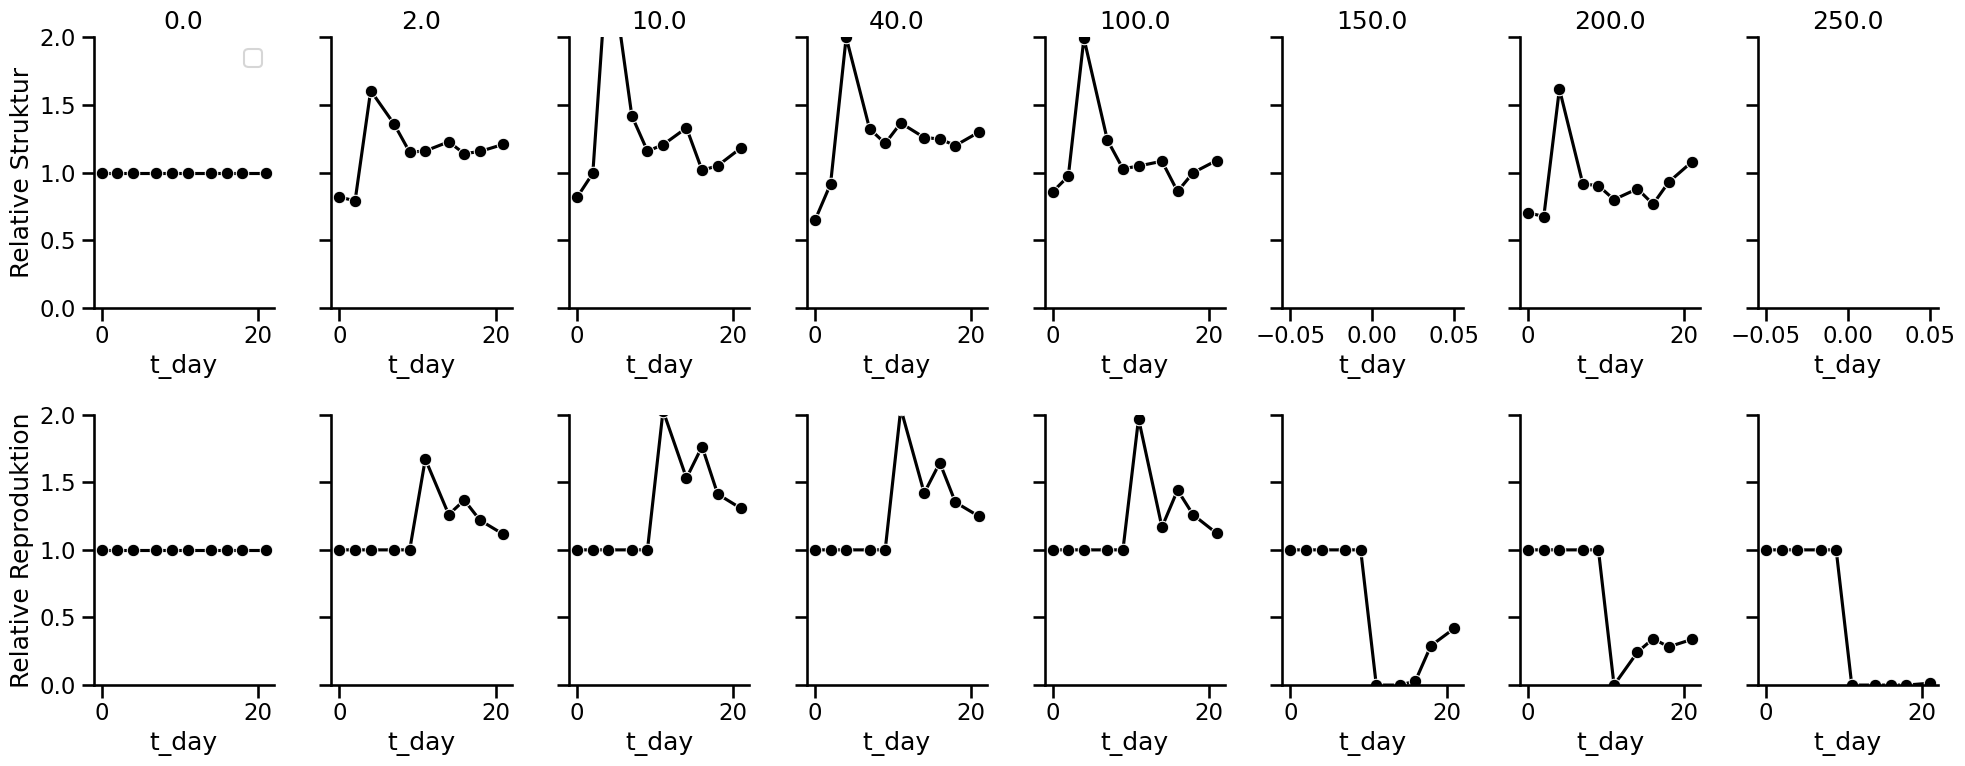

In [ ]:
from Ex03_TKTDFitting_Folsomia import *
sns.set_context('talk')

data = load_data()
_ = plot_data(data)

## Aufgabe: Physiological Mode of Action (PMoA)

<div style="border: 1px solid; background-color: #20b2aa; padding: 10px; border-radius: 5px; color: #ffffff">
    <strong>Action:</strong> <br>
    Beurteilen Sie anhand der obigen Abbildung, welcher physiological mode of action (PMoA) die Daten am wahrscheinlichsten gut beschreiben wird. <br><br>  
    Zur Auswahl stehen:
    - `G`: Verringerung der Wachstums-Effizienz <br>
    - `M`: Zunahme der Instandhaltungskosten <br>
    - `A`: Verringerung der Assimilierungseffizienz <br>
    - `R`: Verringerung der Reproduktionseffizienz <br>

    
Begründen Sie Ihre Wahl.
</div>



### Ihre Lösung

Instandshaltungskosten M

## Aufgabe: TKTD-Modell fitten und interpretieren

Zum Fitten des TKTD-Modells steht eine Vorlage in der Datei `Ex03_TKTDFitting.py` zur Verfügung. <br>
Hier müssen Sie noch den PMoA Ihrer Wahl inherhalb der Funktion `define_defaultparams` eintragen. <br>

<div style="border: 1px solid; background-color: #20b2aa; padding: 10px; border-radius: 5px; color: #ffffff">
    <strong>Action:</strong> <br>
    Führen Sie den TKTD-Modellfit durch. <br>
     Diskutieren Sie die Anpassungsgütze und geschätzten Parameterwerte. <br><br>
</div>

### Lösung

c:\Users\ellar\mem25\content\Part3_DEB\Ex03_TKTDFitting.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mem25\content\Part3_DEB\Ex03_TKTDFitting.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


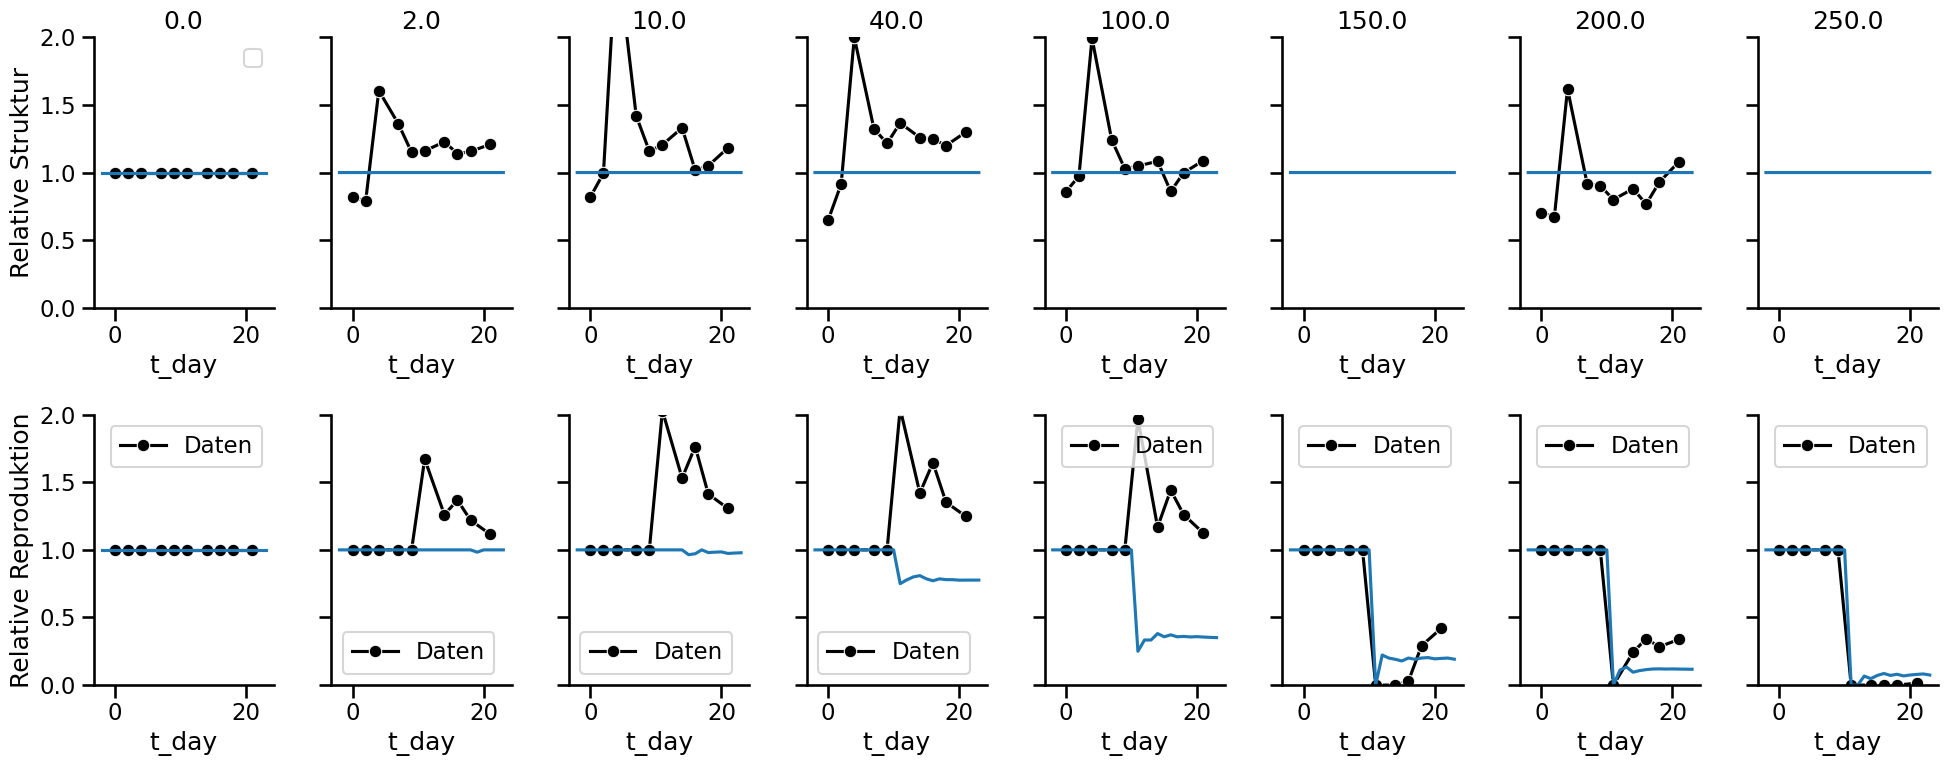

In [ ]:
f = setup_modelfit('M')

sim_intguess = f.simulator(f.intguess)
fig, ax = plot_data(f.data)
ax = plot_sim(ax, sim_intguess)

In [6]:
f.run_optimization() 

Fitted model using Nelder-Mead method. Results stored in `optimization_result`


## Aufgabe: Analyse des Folsomia-Datensatzes

<div style="border: 1px solid; background-color: #20b2aa; padding: 10px; border-radius: 5px; color: #ffffff">
    <strong>Action:</strong> <br>
    Im Unterordner `data/folsimia_cadmium` befinden sich Daten zu Effekten von Cadium auf das Längenwachstum des Springschwanzes Folsomia bei drei Temperaturen. <br>
    Passen Sie die vorhandenen Lösungen an, um ein DEB-TKTD-Modell für Folsomia und Cadium zu kalibrieren. Dokumentieren Sie die Kalibrierung des DEB-Teilmodells und die Wahl des physiologial mode of action. <br><br>
    Nutzen Sie dazu die Daten bei 20°C und ignorieren Sie den Temperatur-Effekt. <br>
    Die Längenmessungen können Sie mittels der vorgegebenen Funktion in Trockenmasse umrechnen.
</div>

Bei den Expositionsdaten zu Cadmium bei *Folsomia* handelt es sich um Exposition über die Nahrung. <br>
Wir gehen hier der Einfachheit halber von derselben TKTD-Modellformulierung aus wie bei der aquatischen Exposition, was theoretisch gesehen nicht ganz korrekt ist. <br>

In [18]:
def collembola_length_to_weight(L_mm):
    """
    Length-weight-relationship for Collembola (Mercer et al. 2002, Antarctic Science). 

    params:
    - `L_mm`: Length in mm
    
    output:
    - `m_mug`: Dry mass in mug
    """
    m_mug = np.exp(1.339 + 1.992*np.log(L_mm)) # umrechnen Länge in Masse

    return m_mug

### Ihre Lösung

### Lösung

Zunächst korrigieren wir die DEB Parameter. <br>
Ich habe mich hier auf die Nahrungsaufnahme und Wachstumseffizienz beschränkt, unter Anwendung des Zoom-Faktors:

c:\Users\ellar\mem25\content\Part3_DEB\Ex03_DEBfitting_Folsomia.py:88: RuntimeWarning: invalid value encountered in scalar power
  p.spc['Idot_max_rel_emb'] *= zoom_factor_theta**(1/3)


Fitted model using Nelder-Mead method. Results stored in `optimization_result`
Estimated parameter values: {'Idot_max_rel': np.float64(4.5482062001716725), 'eta_AS_0': np.float64(0.4064455981275471)}


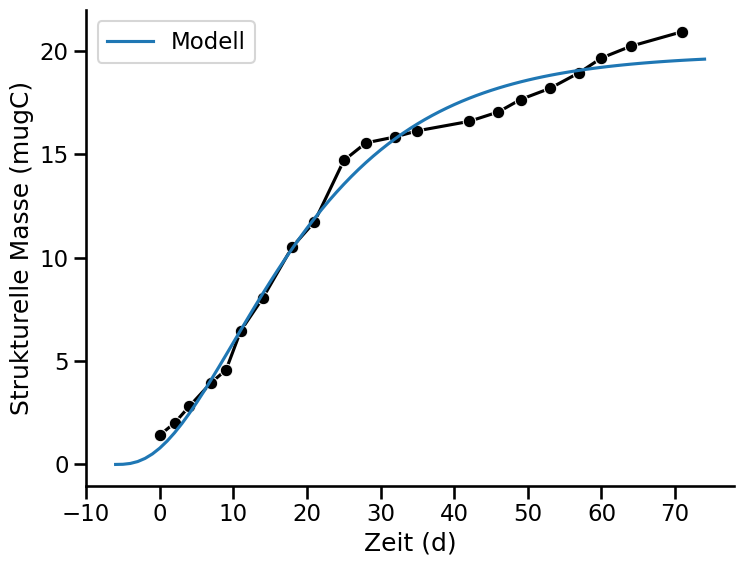

In [21]:
from Ex03_DEBfitting_Folsomia import *

f = fit_model()

In [36]:
from Ex03_TKTDFitting_Folsomia import *

data = load_data()
data

,t_day,length_mm,C_W,T_cels,S
85,0,0.609000,0,20,1.420620
86,2,0.723000,0,20,1.999511
87,4,0.857000,0,20,2.805551
88,7,1.019000,0,20,3.960986
89,9,1.095000,0,20,4.571232
...,...,...,...,...,...
185,53,1.441667,2000,20,7.906406
186,57,1.471667,2000,20,8.237525
187,60,1.491667,2000,20,8.462029
188,64,1.511667,2000,20,8.689539


c:\Users\ellar\mem25\content\Part3_DEB\Ex03_TKTDFitting_Folsomia.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mem25\content\Part3_DEB\Ex03_TKTDFitting_Folsomia.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


array([[<Axes: title={'center': '0 mg/kg'}, xlabel='t_day', ylabel='Struktur (mug)'>,
        <Axes: title={'center': '100 mg/kg'}, xlabel='t_day', ylabel='S'>,
        <Axes: title={'center': '500 mg/kg'}, xlabel='t_day', ylabel='S'>,
        <Axes: title={'center': '1500 mg/kg'}, xlabel='t_day', ylabel='S'>,
        <Axes: title={'center': '2000 mg/kg'}, xlabel='t_day', ylabel='S'>],
       [<Axes: xlabel='t_day', ylabel='Reproduktion (mug)'>,
        <Axes: xlabel='t_day', ylabel='R'>,
        <Axes: xlabel='t_day', ylabel='R'>,
        <Axes: xlabel='t_day', ylabel='R'>,
        <Axes: xlabel='t_day', ylabel='R'>]], dtype=object)

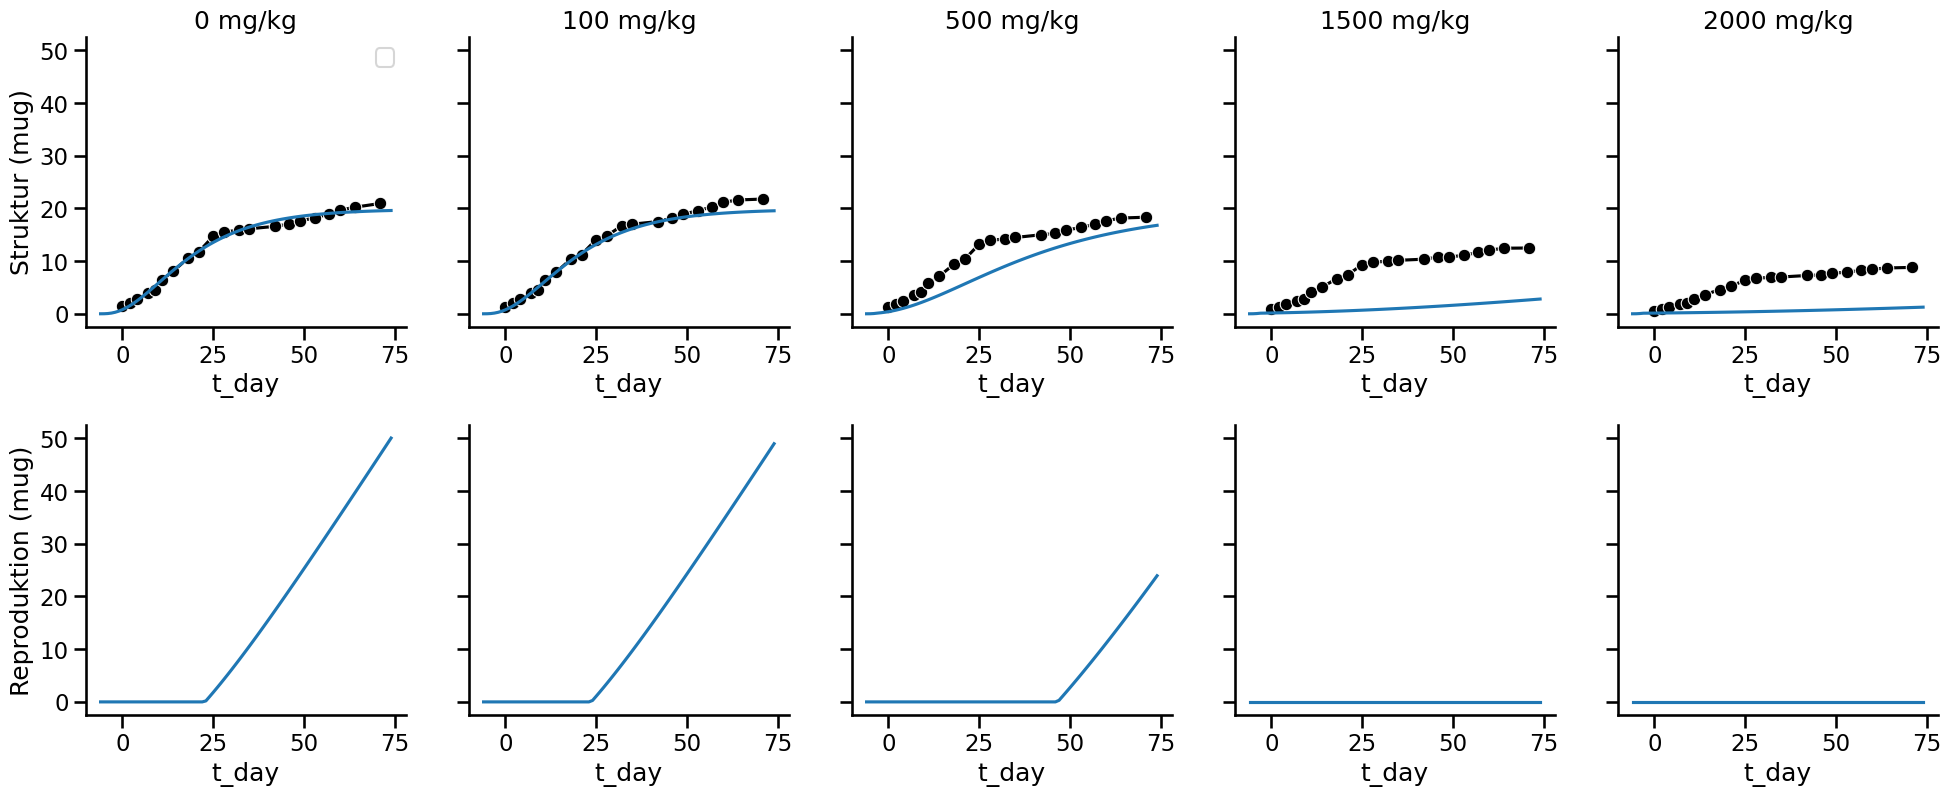

In [44]:
fig,ax = plot_data(data)

# simuliere initial guess
f = setup_modelfit()
sim_intguess = f.simulator(f.intguess)

plot_sim(ax,sim_intguess)

In [48]:
from Ex03_TKTDFitting_Folsomia import *

f = fit_model()

KeyboardInterrupt: 

In [49]:
f = setup_modelfit("G")
f.run_optimization(
    bounds =[(0,1),(100,10_000),(1,10)], 
    options={'maxiter' : 100}
)


#grenzen setzen, parameter bleiben aber unsinnig
#mehrere pMoAs testen

Fitted model using Nelder-Mead method. Results stored in `optimization_result`


In [51]:
f = setup_modelfit("M")
f.define_lognorm_prior(sigma=0.5)
f.run_bayesian_inference(
    popsize = 50,
    max_total_nr_simulations=100
)

c:\Users\ellar\anaconda3\envs\mempydeb\Lib\site-packages\pyabc\storage\bytes_storage.py:37: UserWarning: Can't find pyarrow, falling back to less efficient csv to store pandas DataFrames.
Install e.g. via `pip install pyabc[pyarrow]`
  return df_to_bytes(object_)
ABC.History INFO: Start <ABCSMC id=1, start_time=2025-02-27 16:55:01>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 1.04531303e+00.
c:\Users\ellar\anaconda3\envs\mempydeb\Lib\site-packages\pyabc\storage\bytes_storage.py:37: UserWarning: Can't find pyarrow, falling back to less efficient csv to store pandas DataFrames.
Install e.g. via `pip install pyabc[pyarrow]`
  return df_to_bytes(object_)
ABC INFO: Accepted: 50 / 120 = 4.1667e-01, ESS: 5.0000e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:02:55.636597, end_time=2025-02-27 16:57:57>


Conducted Bayesian inference using SMC-ABC. Results are in `abc_history` and `accepted`


In [50]:
f.optimization_result

       message: Maximum number of iterations has been exceeded.
       success: False
        status: 2
           fun: 0.013083074140645985
             x: [ 4.564e-03  1.000e+02  1.000e+00]
           nit: 100
          nfev: 180
 final_simplex: (array([[ 4.564e-03,  1.000e+02,  1.000e+00],
                       [ 4.549e-03,  1.000e+02,  1.000e+00],
                       [ 4.572e-03,  1.000e+02,  1.000e+00],
                       [ 4.573e-03,  1.002e+02,  1.000e+00]]), array([ 1.308e-02,  1.308e-02,  1.308e-02,  1.308e-02]))

<div style="border: 1px solid; background-color: #20b2aa; padding: 10px; border-radius: 5px; color: #ffffff">
    <strong>Action:</strong> <br>
    Diskutieren Sie: <br>
    - Welche Zusammenhänge ignorieren wir, indem wir das TKTD-Modell für aquatische Exposition einfach auf Exposition über die Nahrung anwenden? <br>
    - Welche Probleme könnten sich hierdurch ergeben? <br>
    - Wie könnte man die TKTD-Modellformulierung anpassen, um die Exposition durch die Nahrung adäquat darzustellen? <br>
</div>

## Aufgabe (optional): Extrapolation mit zeitlich variabler Exposition

<div style="border: 1px solid; background-color: #20b2aa; padding: 10px; border-radius: 5px; color: #ffffff">
    <strong>Action:</strong> <br>
    Nutzen Sie die geschätzten Parameter, um die Effekte von Azoxystrobin unter zeitlich variabler Exposition hervorzusagen. <br>
    Hierzu müssen Sie zunächst zeitlich variable Exposition im DEB-TKTD-Modell implementieren. Nutzen Sie den Modellcode in `mempyDEB` als Vorlage, und kombinieren Sie diesen mit den Lösungen aus der Übung zu TK-Modellen. <br><br>
    Die gemessenen Chemikalienkonztentrationen sind in der Datei `AZOXY_DATA/pulsed_exposure.csv`angegeben. Gehen Sie davon aus, dass es sich hier um jeweils ein-tägige Pulse handelt.

</div>